# 1D analysis: `pandas`!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
pd.set_option('max_rows', 6)  # max number of rows to show in this notebook — to save space!

import seaborn as sns  # for better style in plots

For 1D analysis, we are generally thinking about data that varies in time, so time series analysis. The `pandas` package is particularly suited to deal with this type of data, particularly having very convenient methods for interpreting, searching through, and using time representations.

Let's start with the example we started the class with: taxi rides in New York City.

In [6]:
df = pd.read_csv('../data/yellow_tripdata_2016-05-01_decimated.csv', header=0, parse_dates=[0, 2], index_col=[0])

What do all these (and other) input keyword arguments do?

* header: tells which row of the data file is the header, from which it will extract column names
* parse_dates: try to interpret the values in `[col]` or `[[col1, col2]]` as dates, to convert them into `datetime` objects.
* index_col: if no index column is given, an index counting from 0 is given to the rows. By inputting `index_col=[column integer]`, that column will be used as the index instead. This is usually done with the time information for the dataset.
* skiprows: can skip specific rows, `skiprows=[row number list]`, or number of rows to skip, `skiprows=[number of rows integer]`.


In [5]:
df

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,1,2016-05-01 00:17:00,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
2016-05-01 00:00:00,2,2016-05-01 00:00:00,2,18.41,-73.781059,40.645020,2,N,-73.984573,40.768398,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80
2016-05-01 00:00:00,2,2016-05-01 00:08:00,1,1.60,-74.002769,40.728619,1,N,-73.984161,40.737438,1,8.0,0.5,0.5,1.86,0.0,0.3,11.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-01 23:59:00,1,2016-05-02 00:38:00,2,19.80,-73.789543,40.647316,2,N,-74.000298,40.744408,1,52.0,0.0,0.5,6.00,0.0,0.3,58.80
2016-05-01 23:59:00,1,2016-05-02 00:05:00,1,0.50,-73.984489,40.760044,1,N,-73.988449,40.764175,2,5.5,0.5,0.5,0.00,0.0,0.3,6.80
2016-05-01 23:59:00,2,2016-05-02 00:13:00,1,4.05,-73.989357,40.758759,1,N,-73.949982,40.805481,1,14.5,0.5,0.5,2.20,0.0,0.3,18.00


We can check to make sure the date/time information has been read in as the index, which allows us to reference the other columns using this time information really easily:

In [37]:
df.index

DatetimeIndex(['2016-05-01 00:00:00', '2016-05-01 00:00:00',
               '2016-05-01 00:00:00', '2016-05-01 00:00:00',
               '2016-05-01 00:00:00', '2016-05-01 00:00:00',
               '2016-05-01 00:00:00', '2016-05-01 00:00:00',
               '2016-05-01 00:00:00', '2016-05-01 00:00:00',
               ...
               '2016-05-01 23:59:00', '2016-05-01 23:59:00',
               '2016-05-01 23:59:00', '2016-05-01 23:59:00',
               '2016-05-01 23:59:00', '2016-05-01 23:59:00',
               '2016-05-01 23:59:00', '2016-05-01 23:59:00',
               '2016-05-01 23:59:00', '2016-05-01 23:59:00'],
              dtype='datetime64[ns]', name='tpep_pickup_datetime', length=38211, freq=None)

From this we see that the index is indeed using the timing information in the file, and we can see that the `dtype` is `datetime`.

We can now access the file information using keyword arguments, like so:

In [5]:
df['trip_distance']

tpep_pickup_datetime
2016-05-01 00:00:00     3.60
2016-05-01 00:00:00    18.41
2016-05-01 00:00:00     1.60
                       ...  
2016-05-01 23:59:00    19.80
2016-05-01 23:59:00     0.50
2016-05-01 23:59:00     4.05
Name: trip_distance, dtype: float64

We can equivalently access the columns of data as if they are methods. This means that we can use tab autocomplete to see methods and data available in a dataframe.

In [48]:
df.trip_distance

tpep_pickup_datetime
2016-05-01 00:00:00     3.60
2016-05-01 00:00:00    18.41
2016-05-01 00:00:00     1.60
                       ...  
2016-05-01 23:59:00    19.80
2016-05-01 23:59:00     0.50
2016-05-01 23:59:00     4.05
Name: trip_distance, dtype: float64

We can plot in this way, too:

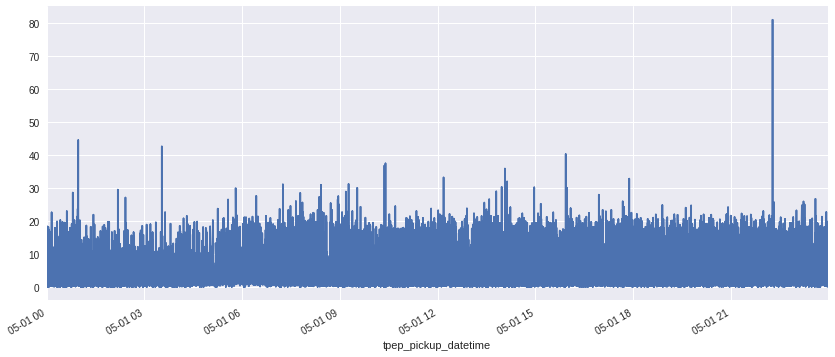

In [49]:
df['trip_distance'].plot(figsize=(14,6))

One of the biggest benefits of using `pandas` is being able to easily reference the data in intuitive ways. For example, because we set up the index of the dataframe to be the date and time, we can pull out data using dates. In the following, we pull out all data from the first hour of the day:

In [10]:
df['2016-05-01 00']

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,1,2016-05-01 00:17:00,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
2016-05-01 00:00:00,2,2016-05-01 00:00:00,2,18.41,-73.781059,40.645020,2,N,-73.984573,40.768398,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80
2016-05-01 00:00:00,2,2016-05-01 00:08:00,1,1.60,-74.002769,40.728619,1,N,-73.984161,40.737438,1,8.0,0.5,0.5,1.86,0.0,0.3,11.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-01 00:59:00,1,2016-05-01 01:09:00,2,2.30,-73.999451,40.728214,1,N,-73.997505,40.745892,2,9.0,0.5,0.5,0.00,0.0,0.3,10.30
2016-05-01 00:59:00,2,2016-05-01 01:14:00,5,3.58,-74.001373,40.761669,1,N,-73.967537,40.791241,1,14.5,0.5,0.5,3.16,0.0,0.3,18.96
2016-05-01 00:59:00,2,2016-05-01 01:08:00,1,1.70,-73.986198,40.752426,1,N,-74.003548,40.740318,1,8.0,0.5,0.5,2.79,0.0,0.3,12.09


Here we further subdivide to examine the passenger count during that time period:

In [11]:
df['passenger_count']['2016-05-01 00']

tpep_pickup_datetime
2016-05-01 00:00:00    1
2016-05-01 00:00:00    2
2016-05-01 00:00:00    1
                      ..
2016-05-01 00:59:00    2
2016-05-01 00:59:00    5
2016-05-01 00:59:00    1
Name: passenger_count, dtype: int64

---
###  *Exercise*

> Figure out how to access the data from dataframe `df` for the first three hours of the day at once. Plot the tip amount (`tip_amount`) for this time period.

> After you can make a line plot, try making a histogram of the data. Play around with the data range and the number of bins.

---

## `groupby`

We can add data to our dataframe very easily. Below we add an index that gives the minute in the hour throughout the day.

We now can use the values from the key `minute` to compute the average of properties over all of the hours in the file, by minute. We access the data in the dataframe, `groupby` the minute of the hour (spanning all of the hours), and then compute the mean. For this dataset, this isn't necessarily a very meaningful computation since why would one part of the hour consistently have different types of taxi rides?

Note that we can change many `plot` parameters directly from `pandas`.

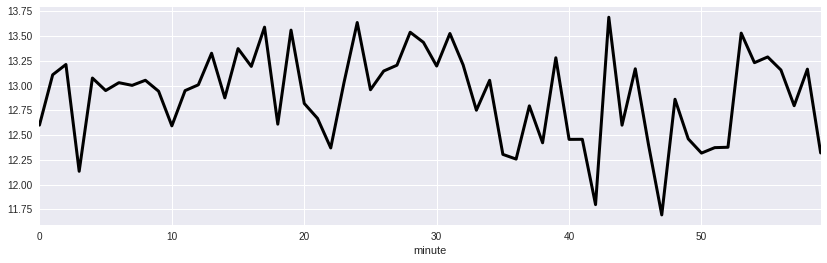

In [28]:
df['minute'] = df.index.minute  # adding a field for the minute of the hour
df.groupby('minute').aggregate(np.mean)['fare_amount'].plot(color='k', grid=True, figsize=(14, 4), lw=3)

### Wind data

Let's read in the wind data file that we have used before to have another data set to use:

In [25]:
df2 = pd.read_table('../data/burl1h2010.txt', header=0, skiprows=[1], delim_whitespace=True, 
                    parse_dates={'dates': ['#YY', 'MM', 'DD', 'hh']},  index_col=0)
df2

,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
dates,,,,,,,,,,,,,,
2010-01-01 00:00:00,0,134,3.0,3.0,99.0,99.0,99.0,999,1019.1,13.3,999.0,12.4,99.0,99.0
2010-01-01 01:00:00,0,123,3.6,3.6,99.0,99.0,99.0,999,1019.1,13.6,999.0,12.7,99.0,99.0
2010-01-01 02:00:00,0,130,3.3,3.3,99.0,99.0,99.0,999,1019.7,13.6,999.0,12.9,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31 21:00:00,0,147,11.4,11.8,99.0,99.0,99.0,999,1012.4,20.4,999.0,19.2,99.0,99.0
2010-12-31 22:00:00,0,152,11.9,12.9,99.0,99.0,99.0,999,1012.6,20.6,999.0,19.6,99.0,99.0
2010-12-31 23:00:00,0,150,10.2,10.9,99.0,99.0,99.0,999,1012.8,20.4,999.0,19.6,99.0,99.0


In [29]:
df2.index

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               ...
               '2010-12-31 14:00:00', '2010-12-31 15:00:00',
               '2010-12-31 16:00:00', '2010-12-31 17:00:00',
               '2010-12-31 18:00:00', '2010-12-31 19:00:00',
               '2010-12-31 20:00:00', '2010-12-31 21:00:00',
               '2010-12-31 22:00:00', '2010-12-31 23:00:00'],
              dtype='datetime64[ns]', name='dates', length=8755, freq=None)

---
###  *Exercise*

> Calculate and plot the monthly average of wind speed.

---

## Resampling

Sometimes we want our data to be at a different sampling frequency that we have, that is, we want to change the time between rows or observations. Changing this is called resampling. We can upsample to increase the number of data points in a given dataset (or decrease the period between points) or we can downsample to decrease the number of data points.

The wind data is given every hour. Here we downsample it to be once a day instead. After the `resample` function, a method needs to be used for how to combine the data over the downsampling period since the existing data needs to be combined in some way. We could use the maximum value over the 1-day period to represent each day:

In [32]:
df2.resample('1d').max()    #['DEWP']  # now the data is daily

,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
dates,,,,,,,,,,,,,,
2010-01-01,0,357,14.0,15.6,99.0,99.0,99.0,999,1025.5,13.6,999.0,12.9,99.0,99.0
2010-01-02,0,33,10.6,11.3,99.0,99.0,99.0,999,1028.8,9.9,999.0,4.5,99.0,99.0
2010-01-03,0,54,10.1,10.9,99.0,99.0,99.0,999,1025.7,8.4,999.0,3.3,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-29,0,170,11.4,12.1,99.0,99.0,99.0,999,1024.5,18.1,999.0,12.8,99.0,99.0
2010-12-30,0,322,14.9,16.1,99.0,99.0,99.0,999,1014.8,20.3,999.0,18.1,99.0,99.0
2010-12-31,0,152,12.0,13.8,99.0,99.0,99.0,999,1015.6,20.7,999.0,19.6,99.0,99.0


We can instead upsample our data. Note that we still need a method on the end, but since we are not combining data but are adding more rows, using a function like `max` doesn't change the existing observations (taking the max of a single row). For the new rows, we haven't said how to fill them so they are nan's by default.

In [56]:
df2.resample('30min').max()

,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
dates,,,,,,,,,,,,,,
2010-01-01 00:00:00,0.0,134.0,3.0,3.0,99.0,99.0,99.0,999.0,1019.1,13.3,999.0,12.4,99.0,99.0
2010-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,0.0,123.0,3.6,3.6,99.0,99.0,99.0,999.0,1019.1,13.6,999.0,12.7,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31 22:00:00,0.0,152.0,11.9,12.9,99.0,99.0,99.0,999.0,1012.6,20.6,999.0,19.6,99.0,99.0
2010-12-31 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-31 23:00:00,0.0,150.0,10.2,10.9,99.0,99.0,99.0,999.0,1012.8,20.4,999.0,19.6,99.0,99.0


Another option is to fill the new rows with data from the previous existing row:

In [58]:
df2.resample('15min').ffill()

,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
dates,,,,,,,,,,,,,,
2010-01-01 00:00:00,0,134,3.0,3.0,99.0,99.0,99.0,999,1019.1,13.3,999.0,12.4,99.0,99.0
2010-01-01 00:15:00,0,134,3.0,3.0,99.0,99.0,99.0,999,1019.1,13.3,999.0,12.4,99.0,99.0
2010-01-01 00:30:00,0,134,3.0,3.0,99.0,99.0,99.0,999,1019.1,13.3,999.0,12.4,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31 22:30:00,0,152,11.9,12.9,99.0,99.0,99.0,999,1012.6,20.6,999.0,19.6,99.0,99.0
2010-12-31 22:45:00,0,152,11.9,12.9,99.0,99.0,99.0,999,1012.6,20.6,999.0,19.6,99.0,99.0
2010-12-31 23:00:00,0,150,10.2,10.9,99.0,99.0,99.0,999,1012.8,20.4,999.0,19.6,99.0,99.0


Let's use this upsampling to every 15 minutes, but what if we don't want nan's, but we also don't want constants filled into the new rows. A reasonable option is to interpolate:

In [59]:
df2.resample('15min').interpolate()

,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
dates,,,,,,,,,,,,,,
2010-01-01 00:00:00,0.0,134.00,3.000,3.00,99.0,99.0,99.0,999.0,1019.10,13.300,999.0,12.400,99.0,99.0
2010-01-01 00:15:00,0.0,131.25,3.150,3.15,99.0,99.0,99.0,999.0,1019.10,13.375,999.0,12.475,99.0,99.0
2010-01-01 00:30:00,0.0,128.50,3.300,3.30,99.0,99.0,99.0,999.0,1019.10,13.450,999.0,12.550,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31 22:30:00,0.0,151.00,11.050,11.90,99.0,99.0,99.0,999.0,1012.70,20.500,999.0,19.600,99.0,99.0
2010-12-31 22:45:00,0.0,150.50,10.625,11.40,99.0,99.0,99.0,999.0,1012.75,20.450,999.0,19.600,99.0,99.0
2010-12-31 23:00:00,0.0,150.00,10.200,10.90,99.0,99.0,99.0,999.0,1012.80,20.400,999.0,19.600,99.0,99.0


The codes for time period/frequency are [available](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) and are presented here for convenience:

    Alias	Description
    B	business day frequency
    C	custom business day frequency (experimental)
    D	calendar day frequency
    W	weekly frequency
    M	month end frequency
    SM	semi-month end frequency (15th and end of month)
    BM	business month end frequency
    CBM	custom business month end frequency
    MS	month start frequency
    SMS	semi-month start frequency (1st and 15th)
    BMS	business month start frequency
    CBMS	custom business month start frequency
    Q	quarter end frequency
    BQ	business quarter endfrequency
    QS	quarter start frequency
    BQS	business quarter start frequency
    A	year end frequency
    BA	business year end frequency
    AS	year start frequency
    BAS	business year start frequency
    BH	business hour frequency
    H	hourly frequency
    T, min	minutely frequency
    S	secondly frequency
    L, ms	milliseconds
    U, us	microseconds
    N	nanoseconds

---
###  *Exercise*

> We looked at NYC taxi trip distance earlier, but it was hard to tell what was going on with so much data. Resample this high resolution data to be lower resolution so that any trends in the information are easier to see. By what method do you want to do this downsampling? Plot your results.

---

---
###  *Exercise*

> Some of NOAA's data is available really easily online. You can look at the meteorological data from a buoy at a website like [this](https://tidesandcurrents.noaa.gov/met.html?id=8770475), for buoy 8770475. You can download the data there or look at plots. 

> You can also directly download data once you know what web address to use to access that data. This can be really useful when you want to automate the process of downloading data instead of having to click around for it, and it matters more the more downloading you want to do. You can access the data from this buoy from January 1st to January 14th, 2016, with the following web address. That means that you can put this dynamic link directly into a call with `pandas` to read in data.

        url = 'https://tidesandcurrents.noaa.gov/cgi-bin/newdata.cgi?type=met&id=8770475&begin=20160101&end=20160114&units=metric&timezone=GMT&mode=csv&interval=6'
        
> Read in this buoy data to a dataframe so that the indices are datetime objects.

> Now, read in data from buoy 8775237 from October 1 to 9, 2017. What is the url you should use to do this?

> After you have the data set read in properly, plot wind speed vs. time with wind speed on the left y-axis, and on the same axes plot wind direction vs. time with wind direction on the right hand y-axis.

> Note: where did I get this url from so that I could download the data directly?

---